In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
def TrainingData():
    link = "http://alaskaairlinescenter.com/contact-us/faq"
    response = requests.get(link)
    soup = BeautifulSoup(response.text, "lxml")
    soup.prettify()
    
    answers = []
    for answer in soup.find_all("p"):
        answers.append(answer.get_text())

    TrainingData = pd.DataFrame(list(zip(answers)), columns=['FAQ Answer'])

    return TrainingData


In [3]:
TrainingData().head()

,FAQ Answer
0,Personal cameras without detachable lens that ...
1,Handheld banners and signs are welcome at Alas...
2,Alaska Airlines Center can be reached by phone...
3,"Prohibited items include, but are not limited ..."
4,The re-entry policy for Alaska Airlines Center...


In [4]:
TrainingData().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 1 columns):
FAQ Answer    13 non-null object
dtypes: object(1)
memory usage: 184.0+ bytes


In [5]:
TrainingData().shape

(13, 1)

In [6]:
TrainingData().describe()

,FAQ Answer
count,13
unique,13
top,ADA tickets are available for all events at Al...
freq,1


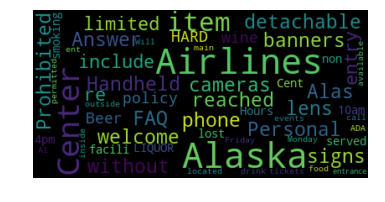

In [7]:
wordcloud = WordCloud(max_font_size=42).generate(str(TrainingData()))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()